In [76]:
import pandas as pd

data = pd.read_csv('./winemag-data-130k-v2.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
print(data.info())

max_features = 5000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB
None


In [77]:
y = data['points']
x = data['description']
import numpy as np
print(y.info())
print(x.info())

y_np = y.to_numpy()

y_mean = y_np.mean()

mean_MSE = ((y_np - y_mean) ** 2).mean()
mean_ABE = np.abs(y_np - y_mean).mean()

print(mean_MSE)
print(mean_ABE)

<class 'pandas.core.series.Series'>
RangeIndex: 129971 entries, 0 to 129970
Series name: points
Non-Null Count   Dtype
--------------   -----
129971 non-null  int64
dtypes: int64(1)
memory usage: 1015.5 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 129971 entries, 0 to 129970
Series name: description
Non-Null Count   Dtype 
--------------   ----- 
129971 non-null  object
dtypes: object(1)
memory usage: 1015.5+ KB
None
9.23988861404755
2.4855143820191024


In [78]:
#baseline test bag of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(max_features=max_features)
vectorizer.fit(x_train)

x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train ABE: ", mean_absolute_error(y_train, y_train_pred))

print("Test MSE: ", mean_squared_error(y_test, y_pred))
print("Test ABE: ", mean_absolute_error(y_test, y_pred))


Train MSE:  2.593312429094546
Train ABE:  1.2678484041736224
Test MSE:  2.879659514647985
Test ABE:  1.3339493294321048


/Users/seanfuhrman/opt/anaconda3/envs/rram-error-model/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


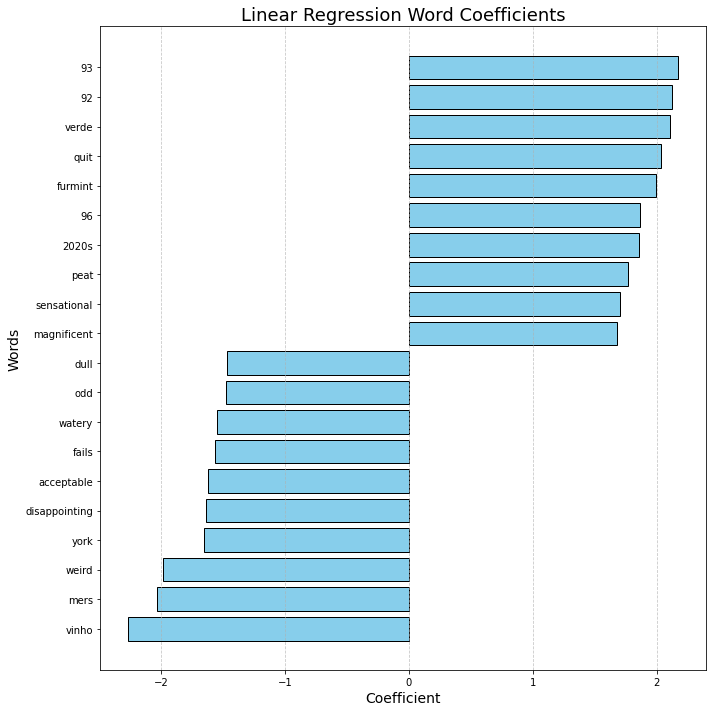

In [79]:
# Find the most significant words
import numpy as np

words = vectorizer.get_feature_names()
coef = model.coef_

import matplotlib.pyplot as plt

# Assuming `words` and `coef` are defined
sorted_indices = coef.argsort()  # Sort coefficients
top_indices = sorted_indices[:10]
bottom_indices = sorted_indices[-10:]

sorted_indices = np.concatenate([top_indices, bottom_indices])

# print(sorted_indices)
sorted_words = [words[i] for i in sorted_indices]
sorted_coef = coef[sorted_indices]

plt.figure(figsize=(10, 10))

# Create a horizontal bar plot
plt.barh(sorted_words, sorted_coef, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Coefficient', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('Linear Regression Word Coefficients', fontsize=18)

# Add grid lines for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig(f'plots/linear_{max_features}.pdf')

plt.show()


In [80]:
#Tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=max_features)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

if isinstance(x_train, pd.Series):
    x_train = x_train.astype(str).tolist()
    x_test = x_test.astype(str).tolist()

vectorizer.fit(x_train)

x_train = vectorizer.transform(x_train)

x_test = vectorizer.transform(x_test)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train ABE: ", mean_absolute_error(y_train, y_train_pred))

print("Test MSE: ", mean_squared_error(y_test, y_pred))
print("Test ABE: ", mean_absolute_error(y_test, y_pred))


Train MSE:  2.512524926048588
Train ABE:  1.2483304933573804
Test MSE:  2.7667580937125504
Test ABE:  1.3116248971992994


/Users/seanfuhrman/opt/anaconda3/envs/rram-error-model/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


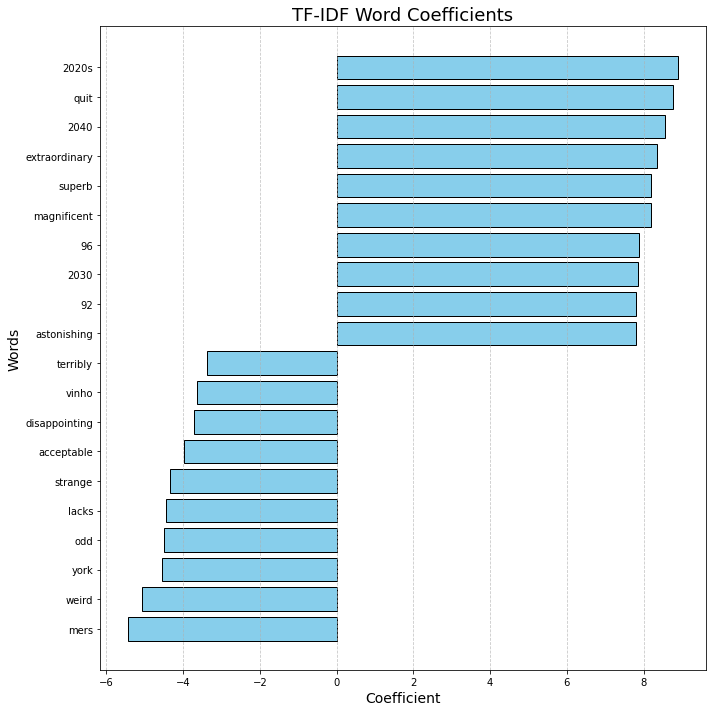

In [81]:
# Find the most significant words
import numpy as np

words = vectorizer.get_feature_names()
coef = model.coef_

import matplotlib.pyplot as plt

# Assuming `words` and `coef` are defined
sorted_indices = coef.argsort()  # Sort coefficients
top_indices = sorted_indices[:10]
bottom_indices = sorted_indices[-10:]

sorted_indices = np.concatenate([top_indices, bottom_indices])

# print(sorted_indices)
sorted_words = [words[i] for i in sorted_indices]
sorted_coef = coef[sorted_indices]

plt.figure(figsize=(10, 10))

# Create a horizontal bar plot
plt.barh(sorted_words, sorted_coef, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Coefficient', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('TF-IDF Word Coefficients', fontsize=18)
# Add grid lines for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig(f'plots/tfidf_{max_features}.pdf')

plt.show()